En este archivo comparamos los datos como series de tiempo por semana. Por una lado usamos las 'ventas', 'litros' y 'precio promedio de gas' vendidos semanalmente y por el otro variables financieras como 'precio del dolar' y el 'indice de materias primas en Estados Unidos'. 

**Importamos las paqueterias necesarias para el analisis.**

In [ ]:
import pandas as pd
import glob
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import matplotlib.dates as mdates
import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importamos los datos de ventas de los años 2017-2022**

In [ ]:
SalesTotal = pd.read_pickle('/content/drive/MyDrive/DATATHON_DSC/Sales_Total/Sales_Total.h5')
SalesTotal

,Empresa,Region,Filial,PdVenta,KeyCliente,KeyFecha,KeyFolio,KeyTicket,Litros,Venta
225847,"MERCANTIL DISTRIBUIDORA, S.A. DE C.V.",Centro,SAN NICOLAS,E.C. RUIZ CORTINEZ 2,M00938,2017-01-01,Cf16R0,yyx7D8,2.0,13.0
111653,"MERCANTIL DISTRIBUIDORA, S.A. DE C.V.",Este,MONTEMORELOS,E.C. CRUZ VERDE,MM0143,2017-01-01,EH14hM,yvC3PX,3.0,26.0
111652,"MERCANTIL DISTRIBUIDORA, S.A. DE C.V.",Este,MONTEMORELOS,E.C. CRUZ VERDE,MM0143,2017-01-01,EH14hL,yvC3PW,5.0,40.0
111651,"MERCANTIL DISTRIBUIDORA, S.A. DE C.V.",Este,MONTEMORELOS,E.C. CRUZ VERDE,MM0143,2017-01-01,EH14hK,yvC3PV,6.0,53.0
111650,"MERCANTIL DISTRIBUIDORA, S.A. DE C.V.",Este,MONTEMORELOS,E.C. CRUZ VERDE,MM0143,2017-01-01,EH14hJ,yvC3PU,2.0,13.0
...,...,...,...,...,...,...,...,...,...,...
209781,"MERCANTIL DISTRIBUIDORA, S.A. DE C.V.",Centro,REYNOSA,ATQ. REY 06,RY0001,2021-12-31,3000-62B9-F62A-1000-1EE2,zVOADA,8.0,81.0
209780,"MERCANTIL DISTRIBUIDORA, S.A. DE C.V.",Centro,REYNOSA,ATQ. REY 23 (077),RY0001,2021-12-31,3001-72B9-F643-9000-83AC,zVOAD9,3.0,28.0
209779,"MERCANTIL DISTRIBUIDORA, S.A. DE C.V.",Centro,REYNOSA,ATQ. REY 23 (077),RY0001,2021-12-31,3001-72B9-F63F-9800-83AB,zVOAD7,13.0,134.0
209794,"MERCANTIL DISTRIBUIDORA, S.A. DE C.V.",Centro,REYNOSA,ATQ. REY 10,RY0001,2021-12-31,3004-F2B9-F382-7800-194D,zVOADX,3.0,31.0


**Agregamos una tabla con el precio del gas**

In [ ]:
SalesTotalGas = SalesTotal.assign(PrecioGas = SalesTotal.Venta/ SalesTotal.Litros)
SalesTotalGas = SalesTotalGas.sort_values(by="KeyFecha")
SalesTotalGas['PrecioGas'] = SalesTotalGas['PrecioGas'].replace(np.inf, np.nan)

**Calculamos una suma de todas las ventas por semana, y el promedio del precio del gas por semana**

In [ ]:
SalesTotalGasDate = SalesTotalGas.set_index("KeyFecha").groupby(pd.Grouper(freq="W")).sum().reset_index()
PrecioPromGasDate = SalesTotalGas.set_index("KeyFecha").groupby(pd.Grouper(freq="W")).mean().reset_index()
SalesTotalLitrosDate = SalesTotalGasDate[['KeyFecha', 'Litros']]
SalesTotalVentaDate = SalesTotalGasDate[['KeyFecha', 'Venta']]
PrecioPromGasDate = PrecioPromGasDate[['KeyFecha', 'PrecioGas']]

In [ ]:
PrecioPromGasDate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   KeyFecha   262 non-null    datetime64[ns]
 1   PrecioGas  262 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.2 KB


**Analizamos otras posibles variables semanales: El precio del dolar con respecto al peso mexicano y el US Commodity Index que es el índice de materias primas en Estados Unidos extraídos de Yahoo Finance:**

*   Dolar: https://finance.yahoo.com/quote/MXN%3DX/history?period1=1483228800&period2=1640908800&interval=1wk&filter=history&frequency=1wk&includeAdjustedClose=true
*   Materias Primas: https://finance.yahoo.com/quote/USCI?p=USCI&.tsrc=fin-srch


In [ ]:
PrecioDelDolar = pd.read_csv('/content/drive/MyDrive/DATATHON_DSC/Variables_Semanales/MXN=X.csv', low_memory=False, index_col=False, thousands=',')
PrecioDelDolar = PrecioDelDolar[['Date','Close']]
PrecioDelDolar['Date'] = pd.to_datetime(PrecioDelDolar['Date'].astype(str))
PrecioDelDolar = PrecioDelDolar.set_index('Date')
USCommodityIndex = pd.read_csv('/content/drive/MyDrive/DATATHON_DSC/Variables_Semanales/USCI.csv', low_memory=False, index_col=False, thousands=',')
USCommodityIndex = USCommodityIndex[['Date','Close']]
USCommodityIndex['Date'] = pd.to_datetime(USCommodityIndex['Date'].astype(str))
USCommodityIndex = USCommodityIndex.set_index('Date')

In [ ]:
SalesTotalLitrosDate = SalesTotalLitrosDate.set_index("KeyFecha")
SalesTotalVentaDate = SalesTotalVentaDate.set_index("KeyFecha")
PrecioPromGasDate = PrecioPromGasDate.set_index("KeyFecha")
PrecioPromGasDate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 262 entries, 2017-01-01 to 2022-01-02
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PrecioGas  262 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


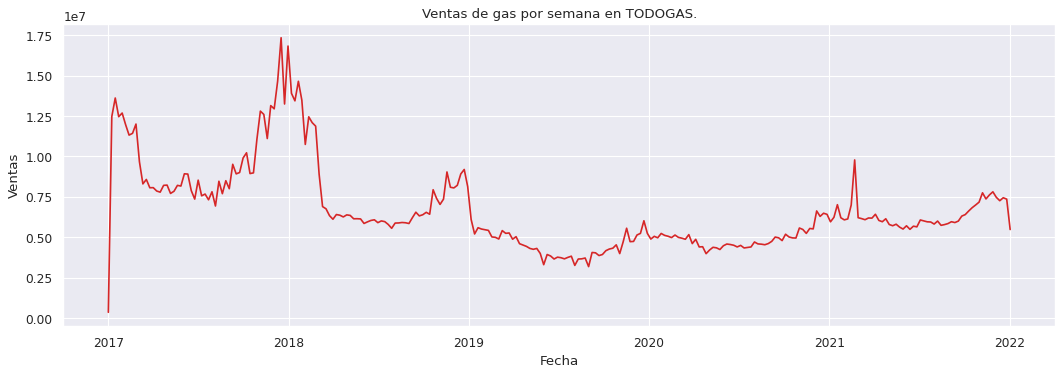

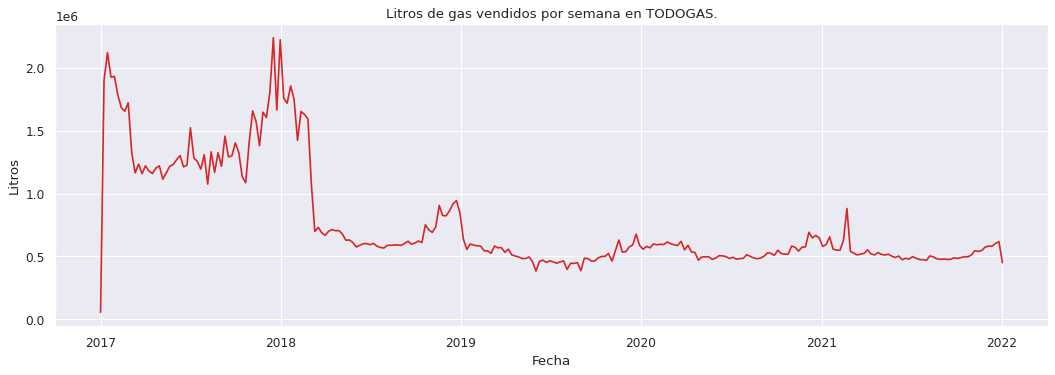

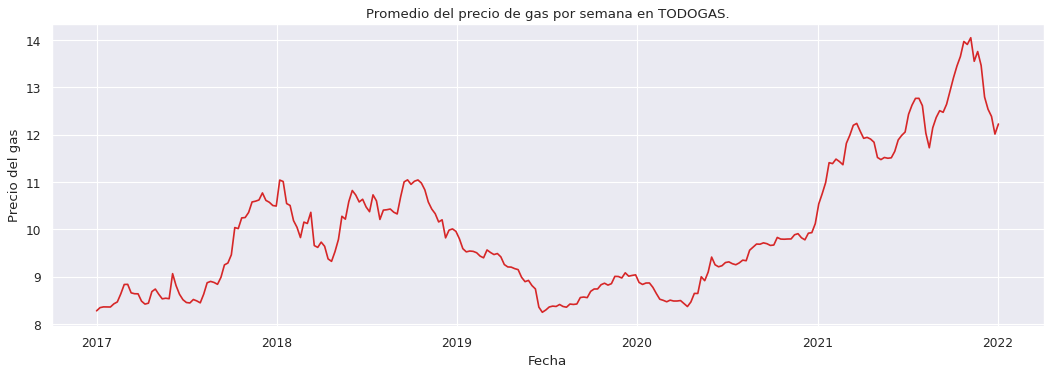

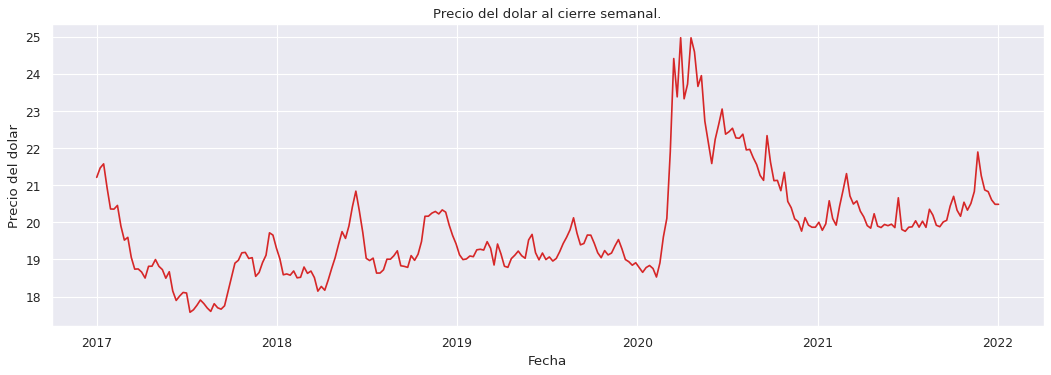

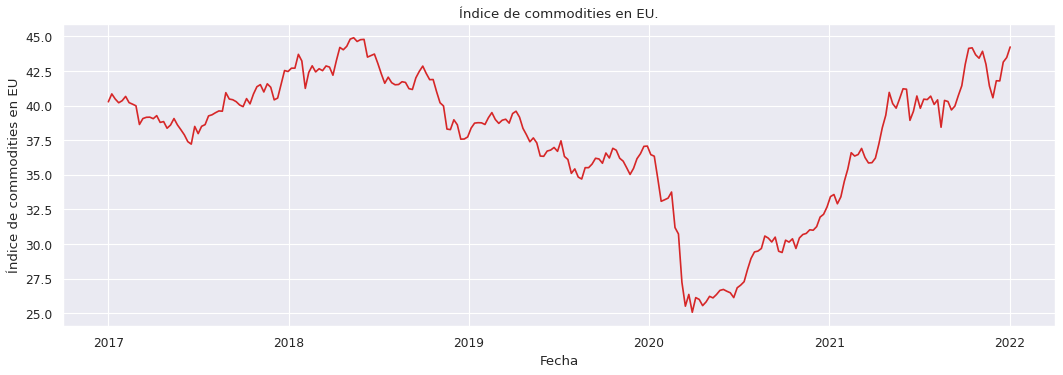

<Figure size 432x288 with 0 Axes>

In [ ]:
def plot_sales(SalesTotalVentaDate, x, y, title="", xlabel='Fecha', ylabel='Ventas', dpi=80):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.savefig("VentasGasPorSemana.pdf", format="pdf", bbox_inches="tight")
    plt.show()
 

def plot_litros(SalesTotalLitrosDate, x, y, title="", xlabel='Fecha', ylabel='Litros', dpi=80):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.savefig("LitrosGasPorSemana.pdf", format="pdf", bbox_inches="tight")
    plt.show()

def plot_gaspromedio(PrecioPromGasDate, x, y, title="", xlabel='Fecha', ylabel='Precio del gas', dpi=80):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.savefig("PrecioGasPorSemana.pdf", format="pdf", bbox_inches="tight")
    plt.show()

def plot_dolar(PrecioDelDolar, x, y, title="", xlabel='Fecha', ylabel='Precio del dolar', dpi=80):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.savefig("PrecioDolarPorSemana.pdf", format="pdf", bbox_inches="tight")
    plt.show()

def plot_USCI(USCommodityIndex, x, y, title="", xlabel='Fecha', ylabel='Índice de commodities en EU', dpi=80):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.savefig("IndiceUSCommodity.pdf", format="pdf", bbox_inches="tight")
    plt.show()



plot_sales(SalesTotalVentaDate, x=SalesTotalVentaDate.index, y=SalesTotalVentaDate.values, title='Ventas de gas por semana en TODOGAS.')
plot_litros(SalesTotalLitrosDate, x=SalesTotalLitrosDate.index, y=SalesTotalLitrosDate.values, title='Litros de gas vendidos por semana en TODOGAS.')
plot_gaspromedio(PrecioPromGasDate, x=PrecioPromGasDate.index, y=PrecioPromGasDate.values, title='Promedio del precio de gas por semana en TODOGAS.')
plot_dolar(PrecioDelDolar, x=PrecioDelDolar.index, y=PrecioDelDolar.values, title='Precio del dolar al cierre semanal.')    
plot_USCI(USCommodityIndex, x=USCommodityIndex.index, y=USCommodityIndex.values, title='Índice de commodities en EU.')
plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")

In [ ]:
!jupyter nbconvert --to html '/content/drive/MyDrive/DATATHON_DSC/Analisis_Variables_Semanal.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/DATATHON_DSC/Analisis_Variables_Semanal.ipynb to html
[NbConvertApp] Writing 575289 bytes to /content/drive/MyDrive/DATATHON_DSC/Analisis_Variables_Semanal.html
